## Network Science Lab

### Task 1: working with Numpy arrays and sparse matrices

numpy arrays and sparse matrices (see documentation for scipy.sparse: https://docs.scipy.org/doc/scipy/reference/sparse.html) are powerful tools provided that they are used properly. Key points are to avoid loops and unnecessary calculations and to use built-in methods and functions. In this task, you will carry out simple matrix calculations to build upon this idea

Functions for loop-based and vectorized addition of two matrices are given below. The functions also return timing results.

In [1]:
import numpy as np
import networkx as nx
from time import time
def add1(A,B):
    """Add two matrices of identical shape element-by-element and collect
    timing information"""
    C = A.copy()
    N,M = A.shape
    t1 = time()
    for i in range(N):
        for j in range(M):
            C[i,j]=A[i,j]+B[i,j]
    t2 = time()
    return C,t2-t1

def add2(A,B):
    """ Vectorized addition of two arrays/matrices of identical shape; timing information
    is also collected"""
    t1 = time()
    C = A+B
    t2 = time()
    return C,t2-t1
    

1) Generate two B-A graphs with N=5000, M=3. For each graph, generate two adjacency matrices, one stored as a sparse matrix and one stored as a numpy array

In [8]:
G1 = nx.barabasi_albert_graph(n = 5000, m = 3)
G2 = nx.barabasi_albert_graph(n = 5000, m = 3)

A1S = nx.to_scipy_sparse_array(G1)
A2S = nx.to_scipy_sparse_array(G2)

A1A = nx.to_numpy_array(G1)
A2A = nx.to_numpy_array(G1)

2) Now compare the times taken for (a) loop-based addition of the two numpy arrays, (b) vectorized addition of the two numpy arrays, and (c) vectorized addition of the two sparse matrices. What do you observe? Can you explain your observations?

In [9]:
add1(A1A, A2A)

(array([[0., 2., 2., ..., 0., 0., 0.],
        [2., 0., 0., ..., 0., 0., 0.],
        [2., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 25.463724613189697)

In [10]:
add2(A1A, A2A)

(array([[0., 2., 2., ..., 0., 0., 0.],
        [2., 0., 0., ..., 0., 0., 0.],
        [2., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0.17705178260803223)

In [11]:
add2(A1S, A2S)

(<5000x5000 sparse array of type '<class 'numpy.intc'>'
 	with 59770 stored elements in Compressed Sparse Row format>,
 0.0029909610748291016)

### Task 2: Computing the Katz centrality

Here you will develop your own code to efficiently compute the Katz centrality of a Network. Generally, when starting a non-trivial programming task, it is highly-recommended to write down a plan on paper before you write any code. I cannot emphasize enough how highly-recommended this is. For this task, our plan is:
1. Create a small test graph (using the B-A model)
2. Extract the (sparse) adjacency matrix for the graph, $\textrm{A}$
3. Compute the most-positive eigenvalue of A, $\lambda_1$
4. Set the Katz parameter to be $\alpha=0.9/\lambda_1$
5. Construct the (sparse) matrix, $\textrm{M}=\textrm{I}-\alpha \textrm{A}$ and the array corresponding to $\textrm{z}$
6. Solve the system of equations, $\rm Mx=z$ to obtain the Katz centrality, $\rm x$. 
See the cells below for more information on these steps.

In [12]:
#import needed modules and generate small test graph
import numpy as np
import networkx as nx
import scipy.sparse as sp

N = 20
G = nx.barabasi_albert_graph(N,4)

1) Extract the sparse adjacency matrix. Note that the elements the matrix will (probably) be integers, but one of the functions you will use below requires the float datatype. Use the *.astype()* method to convert the datatype of the elements in $\rm A$. 

In [13]:
A = nx.to_scipy_sparse_array(G)

A = A.astype(float) #Use this code to convert datatype of elements in A to float

2) Now compute $\lambda_1$ using *sp.linalg.eigsh*. Browse the documentation for the function here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html#scipy.sparse.linalg.eigsh
How should the input parameters *which* and *k* be set?

In [37]:
lambda1 = sp.linalg.eigsh(A, k = 1, which = 'LM')[0][0]

lambda1

7.566068135366459

3) Set $\alpha=0.9/\lambda_1$

In [32]:
alpha = 0.9 / lambda1

alpha

0.11895214051709163

4) Construct $\rm M$ and $\rm z$. Browse through the documentation on functions for building sparse matrices for helpful information on assembling $\rm M$: https://docs.scipy.org/doc/scipy/reference/sparse.html#functions.    

In [33]:
M = sp.identity(N) - alpha * A

z = np.ones((N, 1))

5) Solve the Katz system of equations using sp.linalg.spsolve to obtain $\rm x$

In [38]:
x = sp.linalg.spsolve(M, z)

x

array([16.81234779,  5.49144047, 10.03272553, 10.49598895,  6.4860662 ,
       14.07489412, 13.56251622, 11.79701325,  9.37351687,  9.3234791 ,
        8.05902958,  8.26688447,  5.59380275,  7.38351893,  7.17367368,
        6.80090927,  6.42516289,  5.88034323,  6.76071288,  5.97999433])

6) Check that your centrality vector does not have elements of differing sign. How else could you check the correctness of your result?

7) The cell below loads a co-appearance network for 77 characters in the Victor Hugo novel, [Les Miserables](https://en.wikipedia.org/wiki/Les_Misérables). It also produces lists of node names and degrees. Compute the Katz centrality for the network and make a plot of the Katz centrality vs. node degree. Are there notable differences?

Text(0, 0.5, 'Degree')

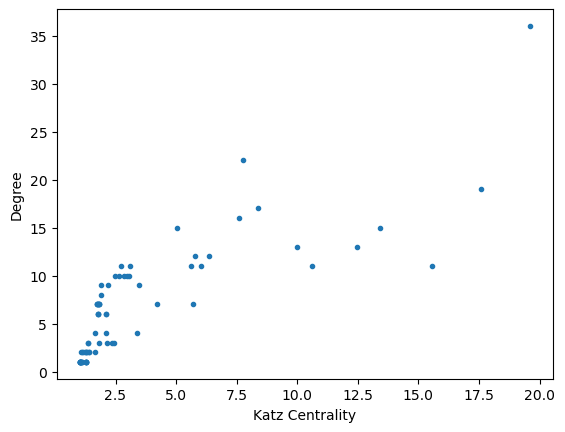

In [48]:
import matplotlib.pyplot as plt
G = nx.les_miserables_graph()
N = G.number_of_nodes()
names = list(G.nodes()) #character names
k = list(dict(nx.degree(G)).values()) #node degrees

#Add code to compute Katz centrality

A = nx.to_scipy_sparse_array(G)

A = A.astype(float)

lambda1 = sp.linalg.eigsh(A, k = 1, which = 'LM')[0][0]

alpha = 0.9 / lambda1

M = sp.identity(N) - alpha * A

z = np.ones((N, 1))

x = sp.linalg.spsolve(M, z)

x

#Add code to make plot comparing Katz centrality and node degrees

y = np.arange(N)

plt.plot(x, k, '.')

plt.xlabel('Katz Centrality')
plt.ylabel('Degree')

*Add explanation here*


**Note:** Very old versions of NetworkX (like those that may be found on MLC computers) may not have the nx.les_miserables_graph() function. If that is the case, update NetworkX using the command below, restart the kernel via the "Kernel" menu above, and then try to use the function.

In [ ]:
# Uncomment code below and run cell if needed.
# !pip install --upgrade networkx